In [2]:
import os
import subprocess
import time
import random
import csv
import paramiko
from concurrent.futures import ThreadPoolExecutor
from multiprocessing import Pool
from datetime import datetime

# (1) ############################################## Different Cross-node delays generation #############################################################

def generate_delay_matrix(num_nodes, base_latency, max_additional_latency):
    delay_matrix = [[0 for _ in range(num_nodes)] for _ in range(num_nodes)]
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                additional_latency = random.uniform(0, max_additional_latency)
                distance_factor = abs(i - j) / num_nodes
                simulated_latency = base_latency + additional_latency * distance_factor
                congestion_factor = random.uniform(0.5, 1.5)
                delay_matrix[i][j] = int(simulated_latency * congestion_factor)
    return delay_matrix

In [ ]:
#(1) zero delay with parameters: 
delay_matrix1_zero = generate_delay_matrix(9, 0, 0) 
#(2) light delay with parameters: 
delay_matrix2_light = generate_delay_matrix(9, 5, 20) 
#(3) middle delay with parameters: 
delay_matrix3_mid = generate_delay_matrix(9, 5, 30)
#(4) heavy delay with parameters: 
delay_matrix4_mid = generate_delay_matrix(9, 5, 60) # was using 60

In [ ]:
with open('delay_matrix1_zero_v2.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(delay_matrix1_zero)
with open('delay_matrix2_light_v2.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(delay_matrix2_light)
with open('delay_matrix3_mid_v2.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(delay_matrix3_mid)
with open('delay_matrix4_heavy_v2.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(delay_matrix4_mid)

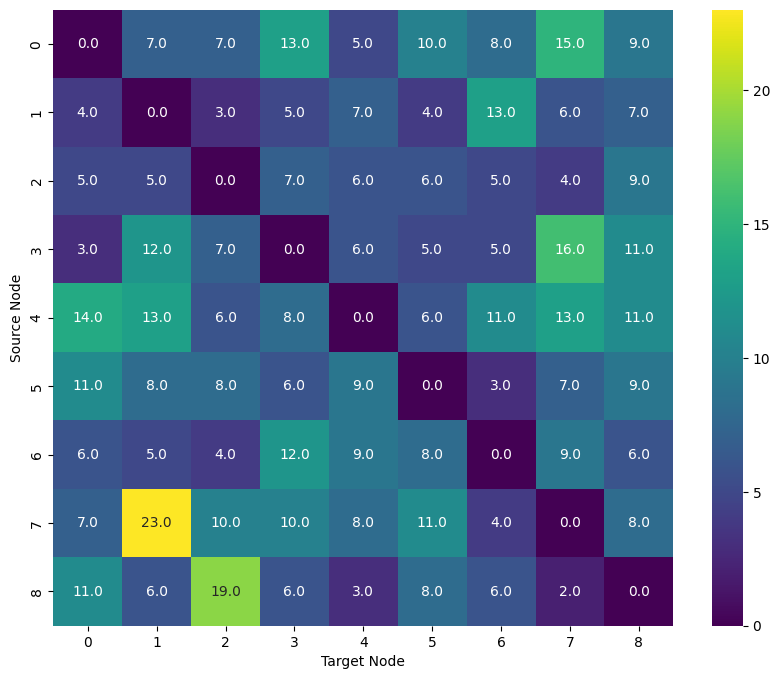

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the delay matrix from the CSV file
delay_matrix = pd.read_csv('delay_matrix2_light.csv', header=None)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(delay_matrix, annot=True, fmt=".1f", cmap="viridis", cbar=True)
# plt.title('Latency Heatmap')
plt.xlabel('Target Node')
plt.ylabel('Source Node')
plt.show()

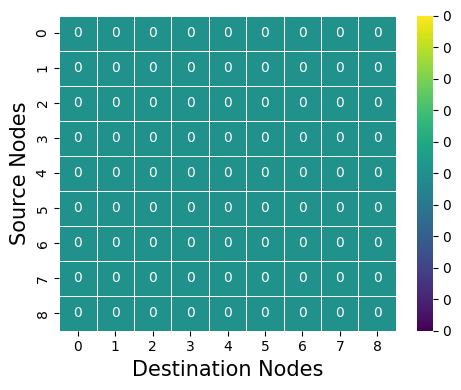

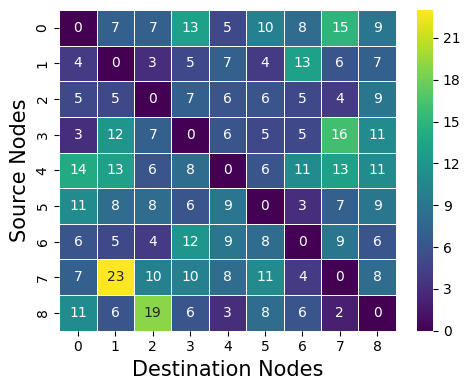

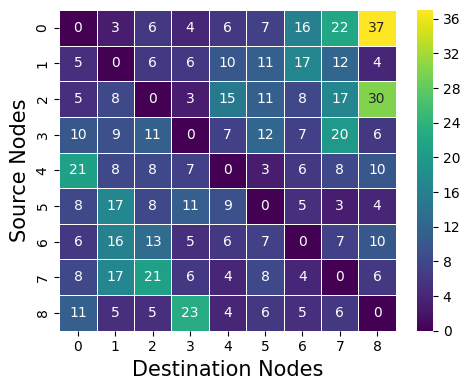

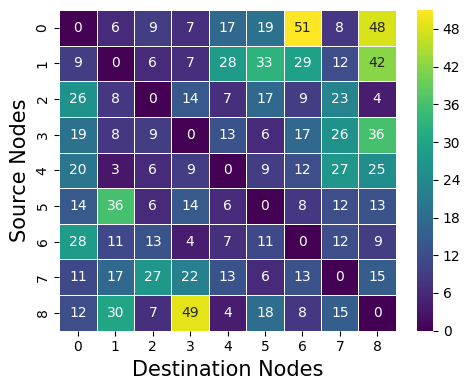

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

delay_matrix0 = 'delay_matrix1_zero.csv'
delay_matrix1 = 'delay_matrix2_light.csv'
delay_matrix2 = 'delay_matrix3_mid.csv'
delay_matrix3 = 'delay_matrix4_heavy.csv'
Matrix = [delay_matrix0, delay_matrix1, delay_matrix2, delay_matrix3]

for path in Matrix:
    # load CSV -> numeric matrix (no header)
    df = pd.read_csv(path, header=None)        # or dtype=float if mixed
    # enforce numeric; fill bad cells as 0 if needed
    df = df.apply(pd.to_numeric, errors="coerce").fillna(0).astype(int)
    # zero self-latency on diagonal
    np.fill_diagonal(df.values, 0)

    plt.figure(figsize=(5, 4))
    ax = sns.heatmap(
        df,
        cmap="viridis",
        linewidths=.5,
        xticklabels=True,
        yticklabels=True,
        cbar_kws={
            "ticks": np.arange(0, df.values.max() + 1, 5),
            "format": "%d"
        },
        annot=True
    )

    # integer-only colorbar ticks
    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter("%d"))

    ax.set_xlabel("Destination Nodes", fontsize=15)
    ax.set_ylabel("Source Nodes", fontsize=15)
    plt.tight_layout()
    plt.show()
    plt.close()


In [5]:
import pandas as pd


# Read the delay matrix from the CSV file
delay_matrix = pd.read_csv('delay_matrix2_light.csv', header=None)
delay_matrix

,0,1,2,3,4,5,6,7,8
0,0,4,6,7,7,15,19,14,18
1,6,0,5,3,12,7,6,11,17
2,5,4,0,7,6,9,12,10,11
3,8,8,3,0,6,5,6,8,7
4,4,7,6,6,0,6,6,5,6
5,7,7,11,7,10,0,7,7,11
6,11,13,8,3,11,7,0,4,8
7,13,13,7,11,10,11,4,0,8
8,13,7,6,16,5,9,2,3,0
